<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#concat()" data-toc-modified-id="concat()-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><code>concat()</code></a></span></li><li><span><a href="#merge()" data-toc-modified-id="merge()-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><code>merge()</code></a></span><ul class="toc-item"><li><span><a href="#Inner-merge" data-toc-modified-id="Inner-merge-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Inner merge</a></span></li><li><span><a href="#Left-merge" data-toc-modified-id="Left-merge-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Left merge</a></span></li></ul></li><li><span><a href="#join()" data-toc-modified-id="join()-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>join()</code></a></span></li></ul></div>

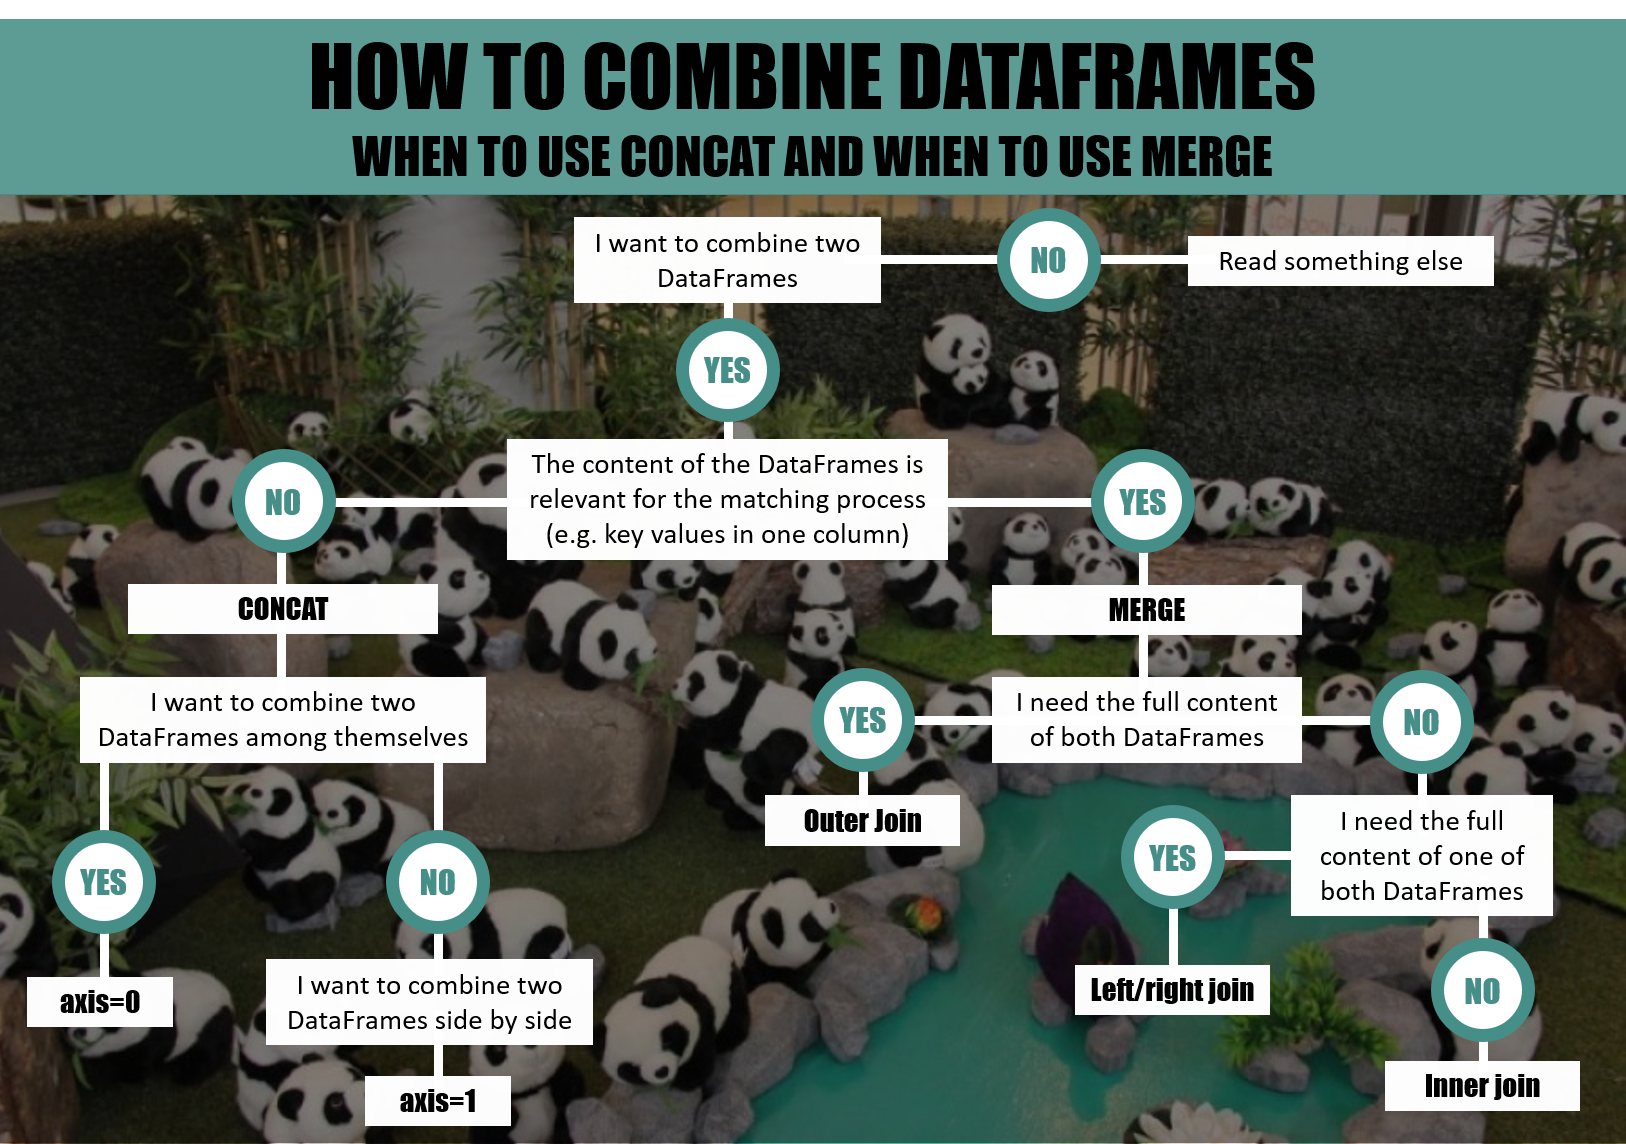

**¿Qué pasaría si nuestros datos no están en un solo archivo sino dispersos en varios?**

Como ya hemos visto las Series y DataFrames de Pandas son potentes herramientas para explorar y analizar datos. Parte de su poder proviene de un enfoque multifacético para combinar conjuntos de datos separados. Con Pandas, puede fusionar, unir y concatenar sus conjuntos de datos, permitiéndole unificar y comprender mejor sus datos mientras los analiza.

En este jupyter, aprenderemos cómo y cuándo combinar sus datos en Pandas con:


- `concat()`: para combinar DataFrames a través de filas o columnas


- `merge()`: para combinar datos en columnas o índices comunes


- `join()`: para combinar datos en una columna clave o un índice


En este caso, tendremos que cargar los archivos uno por uno y combinar los datos en un único *dataframe*  utilizando las siguientes funciones de Pandas:


📌 Más detalles sobre estos métodos [aquí](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [1]:
# antes de empezar, como siempre, importaremos las librerías que necesitaremos

import pandas as pd

pd.options.display.max_columns = None

Para este ejercicio usaremos tres *datasets* de muestreo de especies. En este caso, cada csv corresponde con un año diferente de muestro. Veamos los *datasets*: 

In [2]:
df_2000 = pd.read_csv("datos/survey2000.csv", index_col = 0).reset_index()
df_2001 = pd.read_csv("datos/survey2001.csv", index_col = 0).reset_index()
df_2002 = pd.read_csv("datos/survey2002.csv", index_col = 0).reset_index()

In [3]:
# exploramos el dataset 2000
df_2000.head(2)

,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,30158,30159,1,8,2000,1,PP,F,22.0,17.0
1,30159,30160,1,8,2000,1,DO,M,35.0,53.0


In [4]:
# exploramos el dataset 2001

df_2001.head(2)

,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,31710,31711,1,21,2001,1,PB,F,26.0,25.0
1,31711,31712,1,21,2001,1,DM,M,37.0,43.0


In [5]:
# exploramos el dataset 2002
df_2002.head(2)

,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,33320,33321,1,12,2002,1,DM,M,38.0,44.0
1,33321,33322,1,12,2002,1,DO,M,37.0,58.0


# `concat()`

Esta es la función que deberíamos usar si tenemos varios *dataframes* con los mismos nombres de columnas. 

Podemos utilizar la función `concat` para concatenar columnas o filas de un *dataframe* a otro.

Sintaxis: 

```python
pd.concat(objs, axis=0, join='outer', ignore_index=False)
```
- `objs`: una **lista** con los nombres de los *dataframes* que queremos concatenar


- `axis`: el eje sobre el que queremos aplicar la operación. Por defecto 0

    - `axis=0` le dice a pandas que apile el segundo DataFrame DEBAJO del primero. Es decir, estamos concatenando por **columnas**. Nos unirá por lo nombres de las columnas que sean iguales. 

    >Cuando usamos este eje, tenemos que asegurarnos de que tenemos las mismas columnas y el mismo formato de columna asociado en ambos conjuntos de datos.En caso de que tengamos alguna columna que no este en los dos dataframes, nos pondrá NaN en los valores para el *dataframe* que no tenía esa columna

    - `axis=1` apilará las columnas del segundo DataFrame a la DERECHA del primer DataFrame. Es decir, estamos concatenando por **filas** 

    > Cuando usamos este eje, queremos asegurarnos de que lo que estamos haciendo tiene sentido (es decir, los datos están relacionados de alguna manera).


- `join`: como queremos que sea la unión. Por defecto *outer*, es decir, nos va a pasar la información de las dos tablas. Puede ser también *inner* que se quedará solo con aquellos elementos que aparezcan en las dos tablas. 


- `ignore_index`: por defecto es False. Si es True, no se utilizan los valores de índice a lo largo del eje de concatenación. El eje resultante será etiquetado como 0, ..., n - 1. Esto es útil si está concatenando objetos donde el eje de concatenación no tiene información de indexación significativa. 

In [6]:
# hacemos el concat por columnas

df_concat0 = pd.concat([df_2002, df_2001, df_2000], axis=0, ignore_index = True)
df_concat0.head()

,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,33320,33321,1,12,2002,1,DM,M,38.0,44.0
1,33321,33322,1,12,2002,1,DO,M,37.0,58.0
2,33322,33323,1,12,2002,1,PB,M,28.0,45.0
3,33323,33324,1,12,2002,1,AB,NaN,NaN,NaN
4,33324,33325,1,12,2002,1,DO,M,35.0,29.0


Si nos fijamos, el número de filas del *dataframe* concatenado `df_concat0` son el resultado de la suma de los tres *dataframes*

In [7]:
print(f"las filas y columnas que tenemos en el df_2000 son {df_2000.shape}")
print("-------------------------------------------------------------------")


print(f"las filas y columnas que tenemos en el df_2001 son {df_2001.shape}")
print("-------------------------------------------------------------------")


print(f"las filas y columnas que tenemos en el df_2002 son {df_2002.shape}")
print("-------------------------------------------------------------------")


print(f"las filas y columnas que tenemos en el df_concat0 {df_concat0.shape}")
print("-------------------------------------------------------------------")

las filas y columnas que tenemos en el df_2000 son (1552, 10)
-------------------------------------------------------------------
las filas y columnas que tenemos en el df_2001 son (1610, 10)
-------------------------------------------------------------------
las filas y columnas que tenemos en el df_2002 son (2229, 10)
-------------------------------------------------------------------
las filas y columnas que tenemos en el df_concat0 (5391, 10)
-------------------------------------------------------------------


In [24]:
# concat por las filas
concat1 = pd.concat([df_2002, df_2001, df_2000], axis=1)
concat1.head()

,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,33320,33321,1,12,2002,1,DM,M,38.0,44.0,31710.0,31711.0,1.0,21.0,2001.0,1.0,PB,F,26.0,25.0,30158.0,30159.0,1.0,8.0,2000.0,1.0,PP,F,22.0,17.0
1,33321,33322,1,12,2002,1,DO,M,37.0,58.0,31711.0,31712.0,1.0,21.0,2001.0,1.0,DM,M,37.0,43.0,30159.0,30160.0,1.0,8.0,2000.0,1.0,DO,M,35.0,53.0
2,33322,33323,1,12,2002,1,PB,M,28.0,45.0,31712.0,31713.0,1.0,21.0,2001.0,1.0,PB,M,29.0,44.0,30160.0,30161.0,1.0,8.0,2000.0,1.0,PP,F,21.0,17.0
3,33323,33324,1,12,2002,1,AB,NaN,NaN,NaN,31713.0,31714.0,1.0,21.0,2001.0,1.0,DO,M,34.0,53.0,30161.0,30162.0,1.0,8.0,2000.0,1.0,DM,M,36.0,50.0
4,33324,33325,1,12,2002,1,DO,M,35.0,29.0,31714.0,31715.0,1.0,21.0,2001.0,2.0,OT,M,20.0,27.0,30162.0,30163.0,1.0,8.0,2000.0,1.0,PP,M,20.0,16.0


In [26]:
# también podemos añadir Series
id_ = pd.Series(range(1552))

df_concat2 = pd.concat([df_2000, id_], axis = 1)
df_concat2.head()

,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,0
0,30158,30159,1,8,2000,1,PP,F,22.0,17.0,0
1,30159,30160,1,8,2000,1,DO,M,35.0,53.0,1
2,30160,30161,1,8,2000,1,PP,F,21.0,17.0,2
3,30161,30162,1,8,2000,1,DM,M,36.0,50.0,3
4,30162,30163,1,8,2000,1,PP,M,20.0,16.0,4


# `merge()` 

Probablemente la forma más común de añadir nuevas columnas a un *dataframes* basado en algunas condiciones comunes.


Sintaxis: 

```python
dataframe1.merge(dataframe2, how='inner', on, left_on=None, right_on=None)
```

Donde: 

- `dataframe2`: objeto que vamos a fusionar. 


- `how`: tipo de mergeo que vamos a hacer. Por defecto `inner`. Veámoslo con más detalle: 

    - `left`: usa sólo las claves del *dataframes* izquierdo.

    - `right`: usa sólo las claves del *dataframes* derecho.

    - `outer`: utiliza la unión de las claves de ambos *dataframes*, es decir, me va a devolver todo. 
    
    - `inner`: utiliza la intersección de las claves de ambos *dataframes*.

    - `cross`: crea el producto cartesiano de ambos *dataframes*, conserva el orden de los índices de la izquierda.

- `on`: columna o lista de columnas por las que queremos hacer la unión. 


- `left_on` y `right_on`: son similares al parámetro `on`


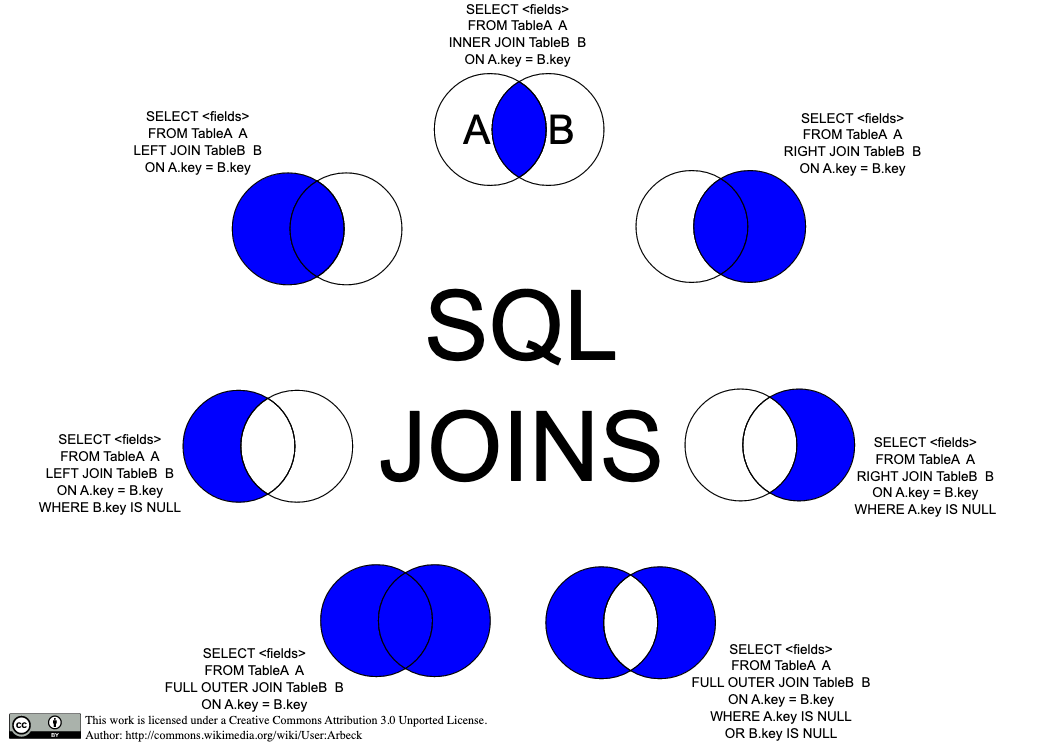


**¿Por qué hacemos esta diferenciación entre `on` , `left_on` y `right_on`?**

- Podemos usar `on` si los nombres de las columnas por los que queremos unir nuestros *datasets* se llaman igual 

- Por el contrario, si las columnas por las que vamos a mergear de nuestros *dataframes* tienen distintos nombres usaremos `left_on` y `right_on`.
Para entenderlo mejor por defecto, el `merge` es como un *inner join* de SQL, visualmente lo veríamos así: 



Para ilustrar el uso de merge() volveremos a nuestro ejemplo de las especies que tenía un marco de datos de muestreos de 2000 , 2001 y 2002. Pero en este caso vamos a incluir un nuevo fichero de datos, el de la información de las especies. 


In [10]:
# cargamos unos nuevos datos
df_species = pd.read_csv("datos/species.csv", index_col = 0).reset_index()
df_species.head()

,species_id,genus,species,taxa
0,AB,Amphispiza,bilineata,Bird
1,AH,Ammospermophilus,harrisi,Rodent
2,AS,Ammodramus,savannarum,Bird
3,BA,Baiomys,taylori,Rodent
4,CB,Campylorhynchus,brunneicapillus,Bird


In [11]:
# recordemos uno de los dataframes de muestreos 
df_2002.head(2)

,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,33320,33321,1,12,2002,1,DM,M,38.0,44.0
1,33321,33322,1,12,2002,1,DO,M,37.0,58.0


In [12]:
print(f"las filas y columnas que tenemos en el df_2002 son {df_2002.shape}")
print("-------------------------------------------------------------------")


print(f"las filas y columnas que tenemos en el df_species son {df_species.shape}")
print("-------------------------------------------------------------------")

las filas y columnas que tenemos en el df_2002 son (2229, 10)
-------------------------------------------------------------------
las filas y columnas que tenemos en el df_species son (54, 4)
-------------------------------------------------------------------


Si nos fijamos, tenemos 5 columnas diferentes a las que teníamos en los dataframes, peeeero hay una columna que comparten! La de `species_id`. 

Esta columna será la que nos permita hacer el mergeo entre los dos *dataframes* 

## Inner merge 

Como tenemos una columna en común que se llama igual en los *dataframes* usaremos el parámetro `on`

In [13]:
# hacemos el primer merge

mergeado_inner = df_2002.merge(df_species, on='species_id')
mergeado_inner.head()

,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,33320,33321,1,12,2002,1,DM,M,38.0,44.0,Dipodomys,merriami,Rodent
1,33328,33329,1,12,2002,2,DM,M,37.0,47.0,Dipodomys,merriami,Rodent
2,33335,33336,1,12,2002,2,DM,F,35.0,45.0,Dipodomys,merriami,Rodent
3,33343,33344,1,12,2002,12,DM,M,36.0,40.0,Dipodomys,merriami,Rodent
4,33346,33347,1,12,2002,12,DM,F,37.0,45.0,Dipodomys,merriami,Rodent


In [14]:
print(f"las filas y columnas que tenemos en el df_2002 son {df_2002.shape}")
print("-------------------------------------------------------------------")


print(f"las filas y columnas que tenemos en el mergeado_inner son {mergeado_inner.shape}")
print("-------------------------------------------------------------------")



las filas y columnas que tenemos en el df_2002 son (2229, 10)
-------------------------------------------------------------------
las filas y columnas que tenemos en el mergeado_inner son (2192, 13)
-------------------------------------------------------------------


Fijaos que ahora tenemos nuestros *datasets* unidos, se nos han juntado las columnas de los *dataframes* en aquellos valores que coinciden los valores de `species_id`, que es por donde hemos especificado que mergee. 

>El *dataframe* mergeado_inner resultante contiene todas las columnas de df_2002 (record_id, month, day	year, etc.) así como todas las columnas de df_species (species_id, genus, species, taxa).
>
>También observamos que mergeado_inner tiene menos filas que df_2002. Esto indica que había filas en df_2002 con valores para species_id que no existen como valores para species_id en df_species.

In [15]:
# 📌 esto es lo mismo que lo anterior: 

mergeado_inner2 = df_2002.merge(df_species, left_on = "species_id", 
                               right_on = "species_id")
mergeado_inner2.head()

,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,33320,33321,1,12,2002,1,DM,M,38.0,44.0,Dipodomys,merriami,Rodent
1,33328,33329,1,12,2002,2,DM,M,37.0,47.0,Dipodomys,merriami,Rodent
2,33335,33336,1,12,2002,2,DM,F,35.0,45.0,Dipodomys,merriami,Rodent
3,33343,33344,1,12,2002,12,DM,M,36.0,40.0,Dipodomys,merriami,Rodent
4,33346,33347,1,12,2002,12,DM,F,37.0,45.0,Dipodomys,merriami,Rodent


## Left merge

Pero usando `merge` podemos hacer otro tipo de uniones en nuestros *dataframes* como el *left join* 


In [16]:
# hacemos el segundo mergeo
mergeado_izq = pd.merge(left=df_2002, right=df_species, how='left',
                        left_on='species_id', right_on='species_id')

mergeado_izq.head()

,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,33320,33321,1,12,2002,1,DM,M,38.0,44.0,Dipodomys,merriami,Rodent
1,33321,33322,1,12,2002,1,DO,M,37.0,58.0,Dipodomys,ordii,Rodent
2,33322,33323,1,12,2002,1,PB,M,28.0,45.0,Chaetodipus,baileyi,Rodent
3,33323,33324,1,12,2002,1,AB,NaN,NaN,NaN,Amphispiza,bilineata,Bird
4,33324,33325,1,12,2002,1,DO,M,35.0,29.0,Dipodomys,ordii,Rodent


In [17]:
print(f"las filas y columnas que tenemos en el df_2002 son {df_2002.shape}")
print("-------------------------------------------------------------------")


print(f"las filas y columnas que tenemos en el mergeado_inner son {mergeado_izq.shape}")
print("-------------------------------------------------------------------")



las filas y columnas que tenemos en el df_2002 son (2229, 10)
-------------------------------------------------------------------
las filas y columnas que tenemos en el mergeado_inner son (2229, 13)
-------------------------------------------------------------------


El DataFrame resultante de una *left join* se parece mucho parece mucho al resultado del *inner join*  en cuanto a las columnas que contiene. Sin embargo, a diferencia del *inner_join* (mergeado_inner), *left_join* (mergeado_izq) contiene el mismo número de filas que el *dataframe* original de df_2002. 

Cuando examinamos mergeado_izq, encontramos que hay filas en las que falta la información que debería proceder de df_species (es decir, species_id, genus y taxa) (contienen valores NaN):

> Tenemos 37 NaN en las columnas species_id, genus, species, taxa del *dataframe* df_species. Esto significa que hay 37 especies que teníamos en el df_2002 que NO aparecían en df_species. 

In [18]:
# nulos

mergeado_izq.isnull().sum()

index                0
record_id            0
month                0
day                  0
year                 0
plot_id              0
species_id          37
sex                101
hindfoot_length    104
weight             145
genus               37
species             37
taxa                37
dtype: int64

# `join()`

Este es un caso especial de fusión cuando al menos una de las columnas sobre las que se está uniendo es un índice. 

Basicamente es lo mismo, pero si queremos usar `join`, la unión la tenemos que hacer por los ìndices. No hace falta que las columnas a fusionar estén sean ìndices, pero **al menos una** debe serlo.

Sintaxis: 

```python
dataframe1.join(dataframe2, on , how = "left" , lsuffix='', rsuffix='')
```

Donde: 

- `on`: la columna o el índice por el que queremos hacer la unión. 


- `how`: por defecto `left`, pero podemos especificar *right*, *outer* o *inner*. 


- `lsuffix`: por defecto nada, en caso de que coincidan columnas en los dataframes que queremos unir, será el sufijo que aparecerá en esas columnas en el dataframe izquierdo



- `rsuffix`: por defecto nada, en caso de que coincidan columnas en los dataframes que queremos unir, será el sufijo que aparecerá en esas columnas en el dataframe derecho


Volvamos sobre nuestro ejemplo recordando sus formas:

In [19]:
print(f"las filas y columnas que tenemos en el df_2002 son {df_2002.shape}")
print("-------------------------------------------------------------------")


print(f"las filas y columnas que tenemos en el mergeado_inner son {df_species.shape}")
print("-------------------------------------------------------------------")



las filas y columnas que tenemos en el df_2002 son (2229, 10)
-------------------------------------------------------------------
las filas y columnas que tenemos en el mergeado_inner son (54, 4)
-------------------------------------------------------------------


Lo primero que tenemos que hacer es establecer en alguno de nuestros *dataframes* la columna de `species_id` (que es la que comparten) como índice. 

In [20]:
# recordamos que para poner una columna como índice tenemos que usar el método "set_index"

df_species.set_index(["species_id"], inplace = True)

In [21]:
# veamos como ha quedado el dataframe. Bravo 👏🏽!ya tenemos nuestro índice.  

df_species.head(2)

,genus,species,taxa
species_id,,,
AB,Amphispiza,bilineata,Bird
AH,Ammospermophilus,harrisi,Rodent


In [22]:
# como en este caso no tenemos columnas coincidentes a parte de las que vamos a usar para 
## juntar nuestros dataframes no le pasaremos los parámetros lsuffix y rsuffix. 

df_join = df_2002.join(df_species, on = "species_id")
df_join.head()

,index,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa
0,33320,33321,1,12,2002,1,DM,M,38.0,44.0,Dipodomys,merriami,Rodent
1,33321,33322,1,12,2002,1,DO,M,37.0,58.0,Dipodomys,ordii,Rodent
2,33322,33323,1,12,2002,1,PB,M,28.0,45.0,Chaetodipus,baileyi,Rodent
3,33323,33324,1,12,2002,1,AB,NaN,NaN,NaN,Amphispiza,bilineata,Bird
4,33324,33325,1,12,2002,1,DO,M,35.0,29.0,Dipodomys,ordii,Rodent


In [23]:
print(f"las filas y columnas que tenemos en el df_2002 son {df_2002.shape}")
print("-------------------------------------------------------------------")


print(f"las filas y columnas que tenemos en el mergeado_inner son {df_join.shape}")
print("-------------------------------------------------------------------")



las filas y columnas que tenemos en el df_2002 son (2229, 10)
-------------------------------------------------------------------
las filas y columnas que tenemos en el mergeado_inner son (2229, 13)
-------------------------------------------------------------------
